In [16]:
# Imports
from suncalc import get_position
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap

In [17]:
# User inputs
object_height = 10 # Height of object in arbitrary units
observed_shadow_length = 8 # Length of shadow in arbitrary units

date_time = datetime.datetime(2018, 6, 7, 14, 0, 0, tzinfo=datetime.timezone.utc) # Date and time of interest

In [18]:
# Main calculation

# Evaluate the sun's  length at a grid of points on the Earth's surface
lats = np.arange(-90, 90, 1)
lons = np.arange(-180, 180, 1)

lons, lats = np.meshgrid(lons, lats)

pos_obj = get_position(date_time, lons, lats)
sun_altitude = pos_obj['altitude'] # in radians

# Calculate the shadow length
shadow_lengths = object_height / np.apply_along_axis(np.tan, 0, sun_altitude) 

# Replace points where the sun is below the horizon with nan
shadow_lengths[sun_altitude <= 0] = np.nan

# Show the relative difference between the calculated shadow length and the observed shadow length
shadow_relative_length_difference = (shadow_lengths - observed_shadow_length)/observed_shadow_length

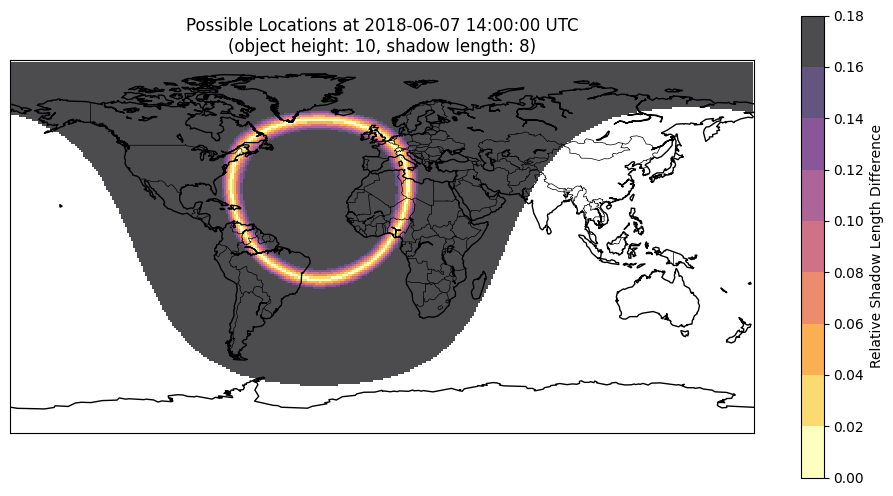

In [19]:
# Plotting

fig = plt.figure(figsize=(12, 6))

# Add a simple map of the Earth
m = Basemap(projection='cyl', resolution='c')
m.drawcoastlines()
m.drawcountries()

# Deal with the map projection
x, y = m(lons, lats)

# Set the a color scale and only show the values between 0 and 0.2
cmap = plt.cm.inferno_r
norm = colors.BoundaryNorm(np.arange(0, 0.2, 0.02), cmap.N)

# Plot the data
m.pcolormesh(x, y, np.abs(shadow_relative_length_difference), cmap=cmap, norm=norm,alpha=0.7)

plt.colorbar(label='Relative Shadow Length Difference')
plt.title(f'Possible Locations at {date_time.strftime('%Y-%m-%d %H:%M:%S %Z')}\n(object height: {object_height}, shadow length: {observed_shadow_length})')
plt.show()
